# Task 2
In this task notebook we try to figure out the representation capabilites of the pretrained models. This gives us a baseline for the experiments that follow.

In [0]:
import torch
import torchvision.datasets as datasets
import torchvision.transforms as transforms
from torchvision import models
import torch.nn as nn
from torch import optim
import numpy as np

In [0]:
batch_size = 64
num_workers = 2

#define transforms
data_transforms = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'val': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}

# load imagenet
image_dataset = {
        'train' :datasets.CIFAR10('./', train=True, download=True, transform=data_transforms['train']),
        'test' : datasets.CIFAR10('./', train=False, download=True, transform=data_transforms['train']) 
}

# Create the dataloaders
data_loader = {
    'train': torch.utils.data.DataLoader(image_dataset['train'], batch_size=batch_size, shuffle=True, num_workers=num_workers),
    'test': torch.utils.data.DataLoader(image_dataset['test'], batch_size=batch_size, shuffle=False, num_workers=num_workers)
}

  0%|          | 0/170498071 [00:00<?, ?it/s]

170500096it [00:01, 86283763.24it/s]                               


Extracting ./cifar-10-python.tar.gz to ./
Files already downloaded and verified


In [0]:
# Freeze all the parameters in the model
def freeze_model(model):
  for params in model.parameters():
    params.requires_grad=False

# check if all the parameters have been freezed
def list_trainable(model):
  for params in model.parameters():
    print(params.requires_grad)
  
# delete the last layers
def del_last_layers(model_class, num_layers):
  model_class = nn.Sequential(*list(model_class.children())[:-num_layers])
  return model_class

## Define Models
We use 4 models in total, 1 vgg and 3 resnet models of varing depth. This gives us an idea of which pretrained model gives us the best representation of the images. The last layer of the models are removed so that only the representation of the images are used.

In [0]:
# Define model
vgg19  = models.vgg19(pretrained=True)
#print(vgg19)


# delete the last 2 layers from classifier
vgg19.classifier = del_last_layers(vgg19.classifier, 2)
# freeze the model
freeze_model(vgg19)
print(vgg19)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padd

In [0]:
vgg16 = models.vgg16(pretrained=True)
#print(vgg16)

freeze_model(vgg16)
vgg16.classifier = del_last_layers(vgg16.classifier, 2)
print(vgg16)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [0]:
resnet50 = models.resnet50(pretrained=True)
# An identity layer to pass the fc layer in resnet
class Identity(nn.Module):
    def __init__(self):
        super(Identity, self).__init__()
        
    def forward(self, x):
        return x
  
resnet50.fc = Identity()
freeze_model(resnet50)
print(resnet50)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [0]:
resnet101 = models.resnet101(pretrained=True)
resnet101.fc = Identity()
freeze_model(resnet101)
print(resnet101)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [0]:
resnet18 = models.resnet18(pretrained=True)
resnet18.fc = Identity()
freeze_model(resnet18)
print(resnet18)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [0]:
# Create the embeddings by passing through the network.
def create_embeddings(model, embedding_size):
  device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
  print(device)

  features = {}
  targets = {}
  model.to(device)
  features['train'] = np.empty([0, embedding_size])
  targets['train'] = np.empty([0, ])

  features['test'] = np.empty([0, embedding_size])
  targets['test'] = np.empty([0,])

  for i, (images,target) in enumerate(data_loader['train']):
    images = images.to(device)
    target = target.to(device)

    try:
      output = model(images).cpu().numpy()
      features['train'] = np.append(features['train'],output, axis=0)
      targets['train'] = np.append(targets['train'],target.cpu(), axis=0)
    except:
      print(output.shape)
      print('error occured: ')
      return (None, None)
    
    if i%100 == 0:
      print(i)

  for i, (images,target) in enumerate(data_loader['test']):
    images = images.to(device)
    target = target.to(device)

    output = model(images).cpu().numpy()
    features['test'] = np.append(features['test'],output, axis=0)
    targets['test'] = np.append(targets['test'],target.cpu(), axis=0)

    if i%100 == 0:
      print(i)
  return (features, targets)

In [0]:
features, target = create_embeddings(resnet18, 512)

cuda
0
100
200
300
400
500
600
700
0
100


In [0]:
features

{'test': array([[1.18268633, 0.18981755, 1.69219184, ..., 0.22449952, 0.24704142,
         0.49937788],
        [0.17624426, 0.73675627, 0.65538597, ..., 0.46503043, 0.20916514,
         0.20870078],
        [0.57060111, 0.27085611, 0.84608346, ..., 0.2679278 , 0.6872744 ,
         0.25338736],
        ...,
        [0.28956747, 0.20485716, 0.49570149, ..., 0.35975844, 0.42593679,
         0.55177748],
        [0.9099412 , 1.04896176, 0.92776847, ..., 0.18074448, 0.94880503,
         0.58626455],
        [0.20227665, 0.2078412 , 0.62090534, ..., 0.74664789, 0.15254535,
         0.54967028]]),
 'train': array([[0.34290197, 0.3516531 , 0.16836886, ..., 1.12460792, 0.4153733 ,
         0.81162322],
        [0.35532054, 0.39838836, 0.78298479, ..., 0.47966096, 0.2362702 ,
         0.13225272],
        [0.54214609, 0.27125943, 0.56183732, ..., 0.6896261 , 0.50241184,
         0.23378018],
        ...,
        [0.06669342, 0.48217702, 0.74614596, ..., 0.62142694, 0.3542684 ,
         0.857500

In [0]:
import pickle

def save(features, targets, model_name):
  with open(model_name+'.embs', 'wb') as file:
    pickle.dump((features,targets), file)
    print('file saved in ', model_name)

def load(model_name):
  with open(model_name+'.embs', 'rb') as file:
    features, targets = pickle.load(file)
    return (features, targets)


In [0]:
# save the computed embeddings
save(features, target, 'resnet18_embeddings')

file saved in  resnet18_embeddings


In [0]:
features, targets = load('vgg19_embeddings')

In [1]:
# Generate all the embeddings for each model
model_dict = {
    'resnet18': resnet18,
    'vgg16':vgg16,
    'vgg19':vgg19,
    'resnet50':resnet50,
    'resnet101':resnet101,
}

for model_name in model_dict.keys():
  model = model_dict[model_name]
  print('embeddings for %s getting ready to play'%(model_name))
  features, targets = create_embeddings(model,  4096 if 'vgg' in model_name else 2048)
  save(features, targets, model_name+'_embeddings')

NameError: name 'resnet18' is not defined

In [0]:
features

{'test': array([[1.18268633, 0.18981755, 1.69219184, ..., 0.22449952, 0.24704142,
         0.49937788],
        [0.17624426, 0.73675627, 0.65538597, ..., 0.46503043, 0.20916514,
         0.20870078],
        [0.57060111, 0.27085611, 0.84608346, ..., 0.2679278 , 0.6872744 ,
         0.25338736],
        ...,
        [0.28956747, 0.20485716, 0.49570149, ..., 0.35975844, 0.42593679,
         0.55177748],
        [0.9099412 , 1.04896176, 0.92776847, ..., 0.18074448, 0.94880503,
         0.58626455],
        [0.20227665, 0.2078412 , 0.62090534, ..., 0.74664789, 0.15254535,
         0.54967028]]),
 'train': array([[0.34290197, 0.3516531 , 0.16836886, ..., 1.12460792, 0.4153733 ,
         0.81162322],
        [0.35532054, 0.39838836, 0.78298479, ..., 0.47966096, 0.2362702 ,
         0.13225272],
        [0.54214609, 0.27125943, 0.56183732, ..., 0.6896261 , 0.50241184,
         0.23378018],
        ...,
        [0.06669342, 0.48217702, 0.74614596, ..., 0.62142694, 0.3542684 ,
         0.857500

In [0]:
# save to google drive 

from google.colab import drive
drive.mount('/gdrive')

#!cd /gdrive/My\ Drive
!cp *.embs /gdrive/My\ Drive/tooploox


Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [0]:
!ls /gdrive/My\ Drive/tooploox

resnet101_embeddings.embs  triplet_resnet18_1.mdl  vgg19_embeddings.embs
resnet18_embeddings.embs   triplet_vgg19.mdl	   vgg19_triplet.embs
resnet18_triplet.embs	   triplet_vgg20_2.mdl
resnet50_embeddings.embs   vgg16_embeddings.embs


In [0]:
# load data
from google.colab import drive
drive.mount('/gdrive')
!cp /gdrive/My\ Drive/tooploox/*.embs ./ 

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /gdrive


In [0]:
target['train'].shape

In [0]:
# model_dict = {
#     'resnet18': resnet18,
#     'vgg16':vgg16,
#     'vgg19':vgg19,
#     'resnet50':resnet50,
#     'resnet101':resnet101,
# }
model_names = ['resnet18', 'vgg16', 'vgg19', 'resnet50', 'resnet101']

# K Nearest Neighbors Classification
This shows us the classification accuracy of the models

In [0]:
for model in model_names[-2:]:
  features,target = load('%s_embeddings'%(model))
  print('accuracy of ', model)
  acc = search_knn_accuracies(k_range, features, target)
  print('final Accuracy: ',sum(acc)/len(acc))

accuracy of  resnet50
K value: 25, accuracy: 0.5266667
K value: 26, accuracy: 0.5333333
K value: 27, accuracy: 0.5300000
K value: 28, accuracy: 0.5266667
K value: 29, accuracy: 0.5366667
final Accuracy:  0.5306666666666666
accuracy of  resnet101
K value: 25, accuracy: 0.5533333
K value: 26, accuracy: 0.5666667
K value: 27, accuracy: 0.5500000
K value: 28, accuracy: 0.5500000
K value: 29, accuracy: 0.5500000
final Accuracy:  0.554


In [0]:
features, target = load('vgg16_embeddings')

In [0]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

k_range = range(25,30)

def search_knn_accuracies(k_range, features, targets):
  acc = []
  for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(features['train'], targets['train'])
    #print('finished fitting')
    predict = knn.predict(features['test'][:300,:])
    #print('predicted')
    score = metrics.accuracy_score(targets['test'][:300], predict)
    print('K value: %d, accuracy: %0.7f' %(k, score))
    acc.append(score)
  return acc



# the best score was obtained when k = 20:24
acc = search_knn_accuracies(k_range, features, targets)
print('final Accuracy: ',sum(acc)/len(acc))

K value: 25, accuracy: 0.5266667
K value: 26, accuracy: 0.5333333
K value: 27, accuracy: 0.5300000
K value: 28, accuracy: 0.5266667
K value: 29, accuracy: 0.5366667
final Accuracy:  0.5306666666666666


# T-SNE plots

In [0]:
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patheffects as PathEffects
from sklearn.manifold import TSNE
%matplotlib inline

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

import seaborn as sns
sns.set_style('darkgrid')
sns.set_palette('muted')
sns.set_context("notebook", font_scale=1.5,
                rc={"lines.linewidth": 2.5})
RS = 123

In [0]:
!ls 

cifar-10-batches-py	   resnet50_embeddings.embs  vgg19_embeddings.embs
cifar-10-python.tar.gz	   sample_data
resnet101_embeddings.embs  vgg16_embeddings.embs


In [0]:
features, target = load('resnet101_embeddings')

In [0]:
# need to create a subset of the data, too much time to process otherwise
x_subset = features['train'][:2000]
y_subset = target['train'][:2000]

print(np.unique(y_subset))

[0. 1. 2. 3. 4. 5. 6. 7. 8. 9.]


In [0]:
labels = {
     0: 'airplane',  
     1: 'automobile',
     2: 'bird',
     3: 'cat',
     4: 'deer',
     5: 'dog',
     6: 'frog',
     7: 'horse',
     8: 'ship',
     9: 'truck',
}

In [0]:
# Utility function to visualize the outputs of PCA and t-SNE

def fashion_scatter(x, colors):
    # choose a color palette with seaborn.
    num_classes = len(np.unique(colors))
    palette = np.array(sns.color_palette("hls", num_classes))

    # create a scatter plot.
    f = plt.figure(figsize=(8, 8))
    ax = plt.subplot(aspect='equal')
    sc = ax.scatter(x[:,0], x[:,1], lw=0, s=40, c=palette[colors.astype(np.int)])
    plt.xlim(-25, 25)
    plt.ylim(-25, 25)
    ax.axis('off')
    ax.axis('tight')

    # add the labels for each digit corresponding to the label
    txts = []

    for i in range(num_classes):

        # Position of each label at median of data points.

        xtext, ytext = np.median(x[colors == i, :], axis=0)
        txt = ax.text(xtext, ytext, str(labels[i]), fontsize=24)
        txt.set_path_effects([
            PathEffects.Stroke(linewidth=5, foreground="w"),
            PathEffects.Normal()])
        txts.append(txt)

    return f, ax, sc, txts

In [0]:
# do pca before passing to tsne to reduce noice and fast performance
time_start = time.time()

pca_50 = PCA(n_components=50)
pca_result_50 = pca_50.fit_transform(x_subset)

print('PCA with 50 components done! Time elapsed: {} seconds'.format(time.time()-time_start))

print('Cumulative variance explained by 50 principal components: {}'.format(np.sum(pca_50.explained_variance_ratio_)))

PCA with 50 components done! Time elapsed: 0.39626359939575195 seconds
Cumulative variance explained by 50 principal components: 0.5932790972083176


In [0]:
# perform tsne on 50 components
import time
time_start = time.time()


fashion_pca_tsne = TSNE(random_state=RS).fit_transform(pca_result_50)

print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

t-SNE done! Time elapsed: 19.34885573387146 seconds


(<Figure size 576x576 with 1 Axes>,
 [Text(3.8733096, 20.420341, 'airplane'),
  Text(-3.1230521, 20.084877, 'automobile'),
  Text(14.789686, -8.128127, 'bird'),
  Text(-0.593919, -11.087115, 'cat'),
  Text(19.450256, -4.505998, 'deer'),
  Text(1.2382542, -12.762147, 'dog'),
  Text(-9.584767, -18.480015, 'frog'),
  Text(10.542914, -1.8429548, 'horse'),
  Text(-8.985455, 14.953584, 'ship'),
  Text(-1.8572845, 21.04965, 'truck')])

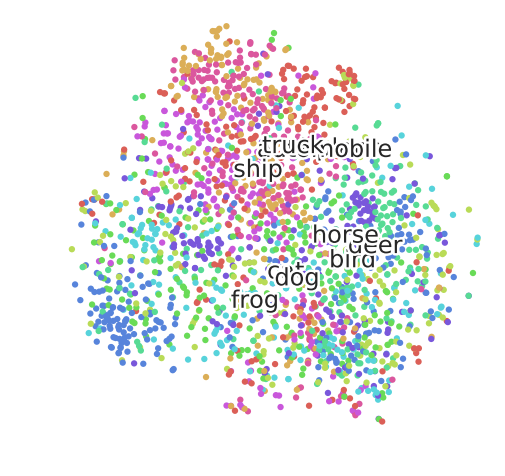

In [0]:
fashion_scatter(fashion_pca_tsne, y_subset)

# Mean Average Precision

In [0]:
def average_precision(vector):
  assert vector.ndim == 1
  sum_precision = 0
  num_true_values = 0
  for i, value in enumerate(vector):
    if value:
      num_true_values += 1
    sum_precision += value*num_true_values/(i+1)
  return sum_precision/(sum(vector)+ 0.00000001)

In [0]:
def mAP(features, targets):

  num_elements_to_retrieve = 50
  num_test_queries = 36

  knn = KNeighborsClassifier(n_neighbors=29)
  knn.fit(features['train'], targets['train'])
  indexes = knn.kneighbors(features['test'][:num_test_queries],num_elements_to_retrieve, return_distance=False)
  results = targets['train'][indexes] == targets['test'][:num_test_queries].reshape(-1, 1)
  APs = []
  for vector in results:
    APs.append(average_precision(vector))
  print('mAP is: ',sum(APs)/len(APs))

In [0]:
features, targets = load('resnet18_triplet_hardestNeg')

In [0]:
mAP(features, targets)

mAP is:  0.29448325638324757


In [0]:
results 

array([[ True, False,  True, False, False, False,  True, False, False,
        False, False, False, False, False,  True,  True, False, False,
        False, False],
       [False, False, False, False, False,  True, False,  True, False,
        False,  True,  True, False,  True, False,  True,  True, False,
        False,  True],
       [False,  True,  True,  True,  True,  True,  True,  True, False,
        False, False, False,  True, False,  True,  True, False, False,
         True, False],
       [ True, False, False, False, False, False, False,  True,  True,
        False,  True, False,  True, False, False, False, False,  True,
        False, False],
       [ True,  True, False,  True,  True, False,  True,  True, False,
         True, False,  True,  True, False,  True,  True,  True, False,
         True,  True],
       [False,  True, False,  True,  True, False,  True, False,  True,
         True, False,  True,  True, False,  True,  True, False,  True,
         True,  True],
       [ T

In [0]:
APs = []
for vector in results:
  APs.append(average_precision(vector))
print('mAP is: ',sum(APs)/len(APs))

mAP is:  0.1854524278715735


In [0]:
results[0].ndim

1